In [1]:
import pandas as pd

from pycaret.classification import *

pd.set_option('display.max_columns',50)

In [2]:
df = pd.read_csv('Diabetes Classification.csv')

In [3]:
df

,race,gender,age,weight,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type_description
0,Caucasian,Female,[0-10),unknown,25,1,1,unknown,Pediatrics-Endocrinology,41,0,1,0,0,0,endocrine,unknown,unknown,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,unknown
1,Caucasian,Female,[10-20),unknown,1,7,3,unknown,unknown,59,0,18,0,0,0,endocrine,endocrine,endocrine,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,YES,Emergency
2,AfricanAmerican,Female,[20-30),unknown,1,7,2,unknown,unknown,11,5,13,2,0,1,pregnancy,endocrine,supplemental,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency
3,Caucasian,Male,[30-40),unknown,1,7,2,unknown,unknown,44,1,16,0,0,0,infections,endocrine,circulatory,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency
4,Caucasian,Male,[40-50),unknown,1,7,1,unknown,unknown,51,0,8,0,0,0,neoplasms,neoplasms,endocrine,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),unknown,3,7,3,MC,unknown,51,0,16,0,0,0,endocrine,mental,circulatory,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,YES,Emergency
101762,AfricanAmerican,Female,[80-90),unknown,4,5,5,MC,unknown,33,3,18,0,0,1,digestive,endocrine,ill-defined,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,Emergency
101763,Caucasian,Male,[70-80),unknown,1,7,1,MC,unknown,53,0,9,1,0,0,infections,genitourinary,mental,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO,Emergency
101764,Caucasian,Female,[80-90),unknown,3,7,10,MC,Surgery-General,45,2,21,0,0,1,injury,blood,injury,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Urgent


In [4]:
df.shape

(101766, 48)

In [5]:
df.describe()

,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   race                        101766 non-null  object
 1   gender                      101766 non-null  object
 2   age                         101766 non-null  object
 3   weight                      101766 non-null  object
 4   discharge_disposition_id    101766 non-null  int64 
 5   admission_source_id         101766 non-null  int64 
 6   time_in_hospital            101766 non-null  int64 
 7   payer_code                  101766 non-null  object
 8   medical_specialty           101766 non-null  object
 9   num_lab_procedures          101766 non-null  int64 
 10  num_procedures              101766 non-null  int64 
 11  num_medications             101766 non-null  int64 
 12  number_outpatient           101766 non-null  int64 
 13  number_emergency            1

## Feature Selection

### Drop columns

In [7]:
df.columns

Index(['race', 'gender', 'age', 'weight', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'payer_code',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'admission_type_description'],
      dtype='object')

In [8]:
df

,race,gender,age,weight,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type_description
0,Caucasian,Female,[0-10),unknown,25,1,1,unknown,Pediatrics-Endocrinology,41,0,1,0,0,0,endocrine,unknown,unknown,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,unknown
1,Caucasian,Female,[10-20),unknown,1,7,3,unknown,unknown,59,0,18,0,0,0,endocrine,endocrine,endocrine,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,YES,Emergency
2,AfricanAmerican,Female,[20-30),unknown,1,7,2,unknown,unknown,11,5,13,2,0,1,pregnancy,endocrine,supplemental,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency
3,Caucasian,Male,[30-40),unknown,1,7,2,unknown,unknown,44,1,16,0,0,0,infections,endocrine,circulatory,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency
4,Caucasian,Male,[40-50),unknown,1,7,1,unknown,unknown,51,0,8,0,0,0,neoplasms,neoplasms,endocrine,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),unknown,3,7,3,MC,unknown,51,0,16,0,0,0,endocrine,mental,circulatory,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,YES,Emergency
101762,AfricanAmerican,Female,[80-90),unknown,4,5,5,MC,unknown,33,3,18,0,0,1,digestive,endocrine,ill-defined,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,Emergency
101763,Caucasian,Male,[70-80),unknown,1,7,1,MC,unknown,53,0,9,1,0,0,infections,genitourinary,mental,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO,Emergency
101764,Caucasian,Female,[80-90),unknown,3,7,10,MC,Surgery-General,45,2,21,0,0,1,injury,blood,injury,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Urgent


In [9]:
df1 = df.drop(['age', 'weight','payer_code','medical_specialty','admission_type_description',
              'acetohexamide','troglitazone','tolazamide', 'examide', 'citoglipton',
              'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone'],axis=1)

In [10]:
df1

,race,gender,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,insulin,glyburide-metformin,glipizide-metformin,change,diabetesMed,readmitted
0,Caucasian,Female,25,1,1,41,0,1,0,0,0,endocrine,unknown,unknown,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,1,7,3,59,0,18,0,0,0,endocrine,endocrine,endocrine,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,Ch,Yes,YES
2,AfricanAmerican,Female,1,7,2,11,5,13,2,0,1,pregnancy,endocrine,supplemental,6,None,None,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,1,7,2,44,1,16,0,0,0,infections,endocrine,circulatory,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,Ch,Yes,NO
4,Caucasian,Male,1,7,1,51,0,8,0,0,0,neoplasms,neoplasms,endocrine,5,None,None,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,3,7,3,51,0,16,0,0,0,endocrine,mental,circulatory,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,Ch,Yes,YES
101762,AfricanAmerican,Female,4,5,5,33,3,18,0,0,1,digestive,endocrine,ill-defined,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,Yes,NO
101763,Caucasian,Male,1,7,1,53,0,9,1,0,0,infections,genitourinary,mental,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,Ch,Yes,NO
101764,Caucasian,Female,3,7,10,45,2,21,0,0,1,injury,blood,injury,9,None,None,No,No,No,No,No,Steady,No,No,Steady,No,No,No,Up,No,No,Ch,Yes,NO


In [11]:
df1.describe()

,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 35 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   discharge_disposition_id  101766 non-null  int64 
 3   admission_source_id       101766 non-null  int64 
 4   time_in_hospital          101766 non-null  int64 
 5   num_lab_procedures        101766 non-null  int64 
 6   num_procedures            101766 non-null  int64 
 7   num_medications           101766 non-null  int64 
 8   number_outpatient         101766 non-null  int64 
 9   number_emergency          101766 non-null  int64 
 10  number_inpatient          101766 non-null  int64 
 11  diag_1                    101766 non-null  object
 12  diag_2                    101766 non-null  object
 13  diag_3                    101766 non-null  object
 14  numb

### Setup the Experiment

In [13]:
exp1 = setup(data=df1, target= 'readmitted', session_id=123, train_size=0.6, normalize=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"NO: 0, YES: 1"
3,Original Data,"(101766, 35)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,28
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [14]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.616400,0.663000,0.431000,0.620900,0.508500,0.210500
1,Gradient Boosting Classifier,0.612900,0.658900,0.436000,0.612800,0.509200,0.204500
2,CatBoost Classifier,0.611900,0.658100,0.487500,0.597300,0.536200,0.208600
3,Ada Boost Classifier,0.609500,0.659500,0.448100,0.604200,0.514100,0.199400
4,Light Gradient Boosting Machine,0.606900,0.649800,0.498500,0.586600,0.538700,0.200200
5,Logistic Regression,0.606400,0.640800,0.464400,0.593700,0.520900,0.195300
6,Ridge Classifier,0.603800,0.000000,0.457300,0.591300,0.515300,0.189400
7,Linear Discriminant Analysis,0.602900,0.635700,0.458400,0.589600,0.515300,0.188000
8,SVM - Linear Kernel,0.586900,0.000000,0.470800,0.575800,0.500100,0.158700
9,Extra Trees Classifier,0.585700,0.616800,0.464800,0.561800,0.508200,0.155900


In [15]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6285,0.6721,0.4965,0.6222,0.5523,0.2416
1,0.6219,0.6519,0.4965,0.6114,0.5479,0.2290
2,0.6448,0.6896,0.5071,0.6471,0.5686,0.2742
3,0.6334,0.6732,0.4858,0.6343,0.5502,0.2499
4,0.5614,0.5994,0.4342,0.5281,0.4766,0.1053
5,0.5967,0.6235,0.4199,0.5871,0.4896,0.1712
6,0.5918,0.6399,0.4270,0.5769,0.4908,0.1627
7,0.5820,0.6160,0.4733,0.5542,0.5106,0.1497
8,0.6016,0.6235,0.4591,0.5864,0.5150,0.1854
9,0.6016,0.6188,0.4448,0.5896,0.5071,0.1837


In [16]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


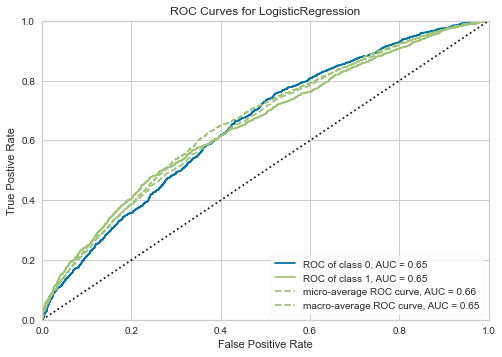

In [17]:
plot_model(lr, plot='auc')

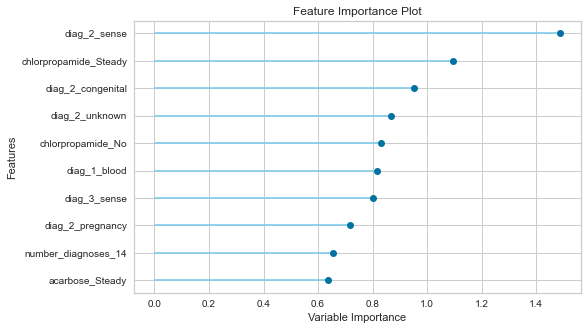

In [18]:
plot_model(lr, plot='feature')

In [19]:
df1.columns

Index(['race', 'gender', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
       'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
       'insulin', 'glyburide-metformin', 'glipizide-metformin', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [20]:
df2 = df1.drop(['nateglinide','glipizide-metformin','chlorpropamide','glipizide','glyburide','num_medications',
               'glimepiride','miglitol','glyburide-metformin','tolbutamide','pioglitazone',
               'num_procedures','change','max_glu_serum','repaglinide','acarbose','rosiglitazone',
               'num_lab_procedures'],axis=1)

In [21]:
df2

,race,gender,discharge_disposition_id,admission_source_id,time_in_hospital,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,A1Cresult,metformin,insulin,diabetesMed,readmitted
0,Caucasian,Female,25,1,1,0,0,0,endocrine,unknown,unknown,1,None,No,No,No,NO
1,Caucasian,Female,1,7,3,0,0,0,endocrine,endocrine,endocrine,9,None,No,Up,Yes,YES
2,AfricanAmerican,Female,1,7,2,2,0,1,pregnancy,endocrine,supplemental,6,None,No,No,Yes,NO
3,Caucasian,Male,1,7,2,0,0,0,infections,endocrine,circulatory,7,None,No,Up,Yes,NO
4,Caucasian,Male,1,7,1,0,0,0,neoplasms,neoplasms,endocrine,5,None,No,Steady,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,3,7,3,0,0,0,endocrine,mental,circulatory,9,>8,Steady,Down,Yes,YES
101762,AfricanAmerican,Female,4,5,5,0,0,1,digestive,endocrine,ill-defined,9,None,No,Steady,Yes,NO
101763,Caucasian,Male,1,7,1,1,0,0,infections,genitourinary,mental,13,None,Steady,Down,Yes,NO
101764,Caucasian,Female,3,7,10,0,0,1,injury,blood,injury,9,None,No,Up,Yes,NO


In [22]:
exp2 = setup(data=df2, target= 'readmitted', session_id=123, train_size=0.6, normalize=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"NO: 0, YES: 1"
3,Original Data,"(101766, 17)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,12
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [23]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.619800,0.665400,0.440300,0.624600,0.516200,0.218200
1,Gradient Boosting Classifier,0.616500,0.663000,0.438500,0.618600,0.513000,0.211700
2,Ada Boost Classifier,0.614600,0.659800,0.452700,0.612000,0.520000,0.209700
3,Light Gradient Boosting Machine,0.608700,0.649300,0.489300,0.591600,0.535400,0.202600
4,Logistic Regression,0.607000,0.645200,0.460100,0.595300,0.518700,0.195900
5,CatBoost Classifier,0.606500,0.649900,0.478600,0.590800,0.528400,0.197200
6,Ridge Classifier,0.600800,0.000000,0.456600,0.585900,0.513000,0.183600
7,Linear Discriminant Analysis,0.600300,0.641400,0.456900,0.585100,0.512900,0.182700
8,Extra Trees Classifier,0.590200,0.617500,0.489000,0.564200,0.523700,0.167300
9,SVM - Linear Kernel,0.587700,0.000000,0.415800,0.595100,0.465200,0.153300


In [24]:
lr2 = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6137,0.6717,0.4823,0.6018,0.5354,0.2117
1,0.6334,0.6635,0.5071,0.6272,0.5608,0.2522
2,0.6514,0.6932,0.5213,0.6533,0.5799,0.2884
3,0.6268,0.6824,0.4858,0.6227,0.5458,0.2373
4,0.5532,0.5959,0.4128,0.5179,0.4594,0.0868
5,0.6033,0.6274,0.4306,0.5961,0.5000,0.1851
6,0.5951,0.6371,0.4270,0.5825,0.4928,0.1689
7,0.5967,0.6279,0.4804,0.5745,0.5233,0.1786
8,0.5984,0.6286,0.4377,0.5857,0.5010,0.1765
9,0.5984,0.6248,0.4164,0.5909,0.4885,0.1739


In [25]:
print(lr2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


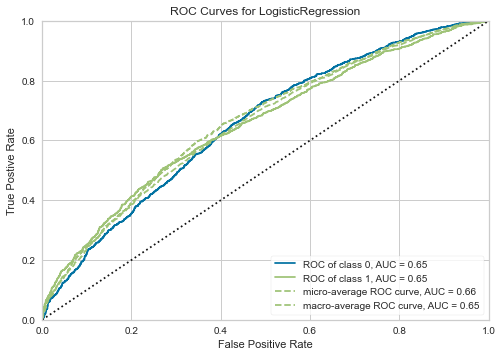

In [26]:
plot_model(lr2, plot='auc')

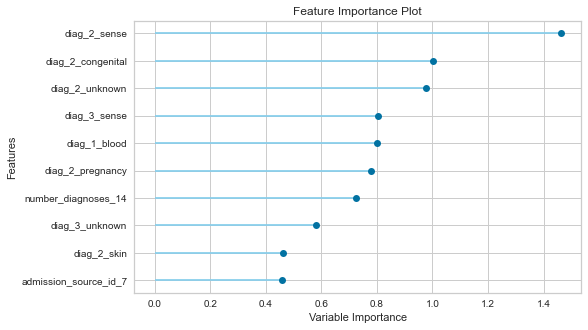

In [27]:
plot_model(lr2, plot='feature')

In [28]:
df2.columns

Index(['race', 'gender', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'A1Cresult', 'metformin', 'insulin', 'diabetesMed', 'readmitted'],
      dtype='object')

In [29]:
df3 = df2.drop(['gender','A1Cresult','race','diag_1','number_inpatient'],axis=1)

In [30]:
df3

,discharge_disposition_id,admission_source_id,time_in_hospital,number_outpatient,number_emergency,diag_2,diag_3,number_diagnoses,metformin,insulin,diabetesMed,readmitted
0,25,1,1,0,0,unknown,unknown,1,No,No,No,NO
1,1,7,3,0,0,endocrine,endocrine,9,No,Up,Yes,YES
2,1,7,2,2,0,endocrine,supplemental,6,No,No,Yes,NO
3,1,7,2,0,0,endocrine,circulatory,7,No,Up,Yes,NO
4,1,7,1,0,0,neoplasms,endocrine,5,No,Steady,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
101761,3,7,3,0,0,mental,circulatory,9,Steady,Down,Yes,YES
101762,4,5,5,0,0,endocrine,ill-defined,9,No,Steady,Yes,NO
101763,1,7,1,1,0,genitourinary,mental,13,Steady,Down,Yes,NO
101764,3,7,10,0,0,blood,injury,9,No,Up,Yes,NO


In [31]:
exp3 = setup(data=df3, target= 'readmitted', session_id=123, train_size=0.6, normalize=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"NO: 0, YES: 1"
3,Original Data,"(101766, 12)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [32]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ada Boost Classifier,0.594700,0.629900,0.459100,0.576000,0.510700,0.172300
1,Extreme Gradient Boosting,0.587900,0.626900,0.426000,0.571500,0.487500,0.155100
2,Gradient Boosting Classifier,0.586400,0.625500,0.428200,0.568700,0.487900,0.152600
3,Light Gradient Boosting Machine,0.581200,0.614800,0.477900,0.553300,0.512600,0.148800
4,Logistic Regression,0.579500,0.610300,0.433500,0.556200,0.486800,0.140100
5,Ridge Classifier,0.578500,0.000000,0.434900,0.554700,0.487100,0.138400
6,Linear Discriminant Analysis,0.578400,0.608000,0.436700,0.554100,0.488000,0.138300
7,CatBoost Classifier,0.575900,0.610700,0.466600,0.546600,0.503200,0.137400
8,SVM - Linear Kernel,0.560700,0.000000,0.391500,0.584900,0.417300,0.100200
9,Random Forest Classifier,0.556900,0.570800,0.417200,0.524300,0.464500,0.095000


In [33]:
lr3 = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6023,0.6402,0.4645,0.5874,0.5188,0.1877
1,0.6137,0.6518,0.5071,0.5958,0.5479,0.2145
2,0.6072,0.6591,0.4574,0.5972,0.5181,0.1963
3,0.6023,0.6484,0.4326,0.5951,0.5010,0.1839
4,0.5483,0.5762,0.4199,0.5108,0.4609,0.0785
5,0.5656,0.5825,0.4235,0.5360,0.4732,0.1121
6,0.5689,0.5909,0.4199,0.5413,0.4729,0.1179
7,0.5639,0.5897,0.4413,0.5322,0.4825,0.1114
8,0.5656,0.5978,0.4093,0.5374,0.4646,0.1103
9,0.5574,0.5665,0.3594,0.5288,0.4280,0.0879


In [34]:
print(lr3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


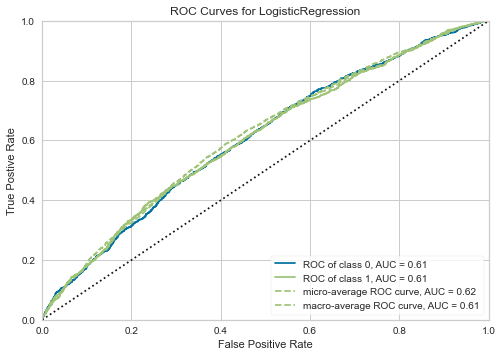

In [35]:
plot_model(lr3, plot='auc')

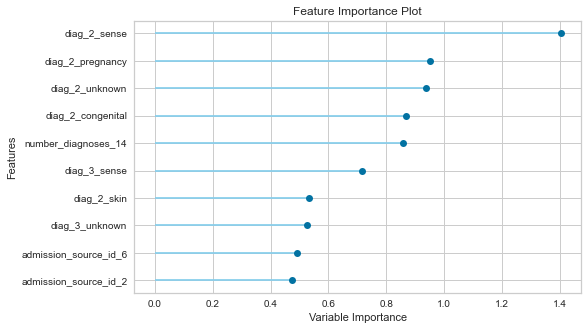

In [36]:
plot_model(lr3, plot='feature')

## Tuning Model Hyperparameters

In [37]:
tuned_lr = tune_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6023,0.6399,0.4645,0.5874,0.5188,0.1877
1,0.6121,0.6533,0.5071,0.5934,0.5468,0.2114
2,0.6072,0.6586,0.4574,0.5972,0.5181,0.1963
3,0.6023,0.6480,0.4326,0.5951,0.5010,0.1839
4,0.5516,0.5756,0.4270,0.5150,0.4669,0.0857
5,0.5656,0.5821,0.4235,0.5360,0.4732,0.1121
6,0.5656,0.5908,0.4199,0.5364,0.4711,0.1117
7,0.5623,0.5899,0.4377,0.5302,0.4795,0.1078
8,0.5656,0.5976,0.4128,0.5370,0.4668,0.1107
9,0.5590,0.5662,0.3630,0.5312,0.4313,0.0915


In [38]:
print(tuned_lr)

LogisticRegression(C=1.94, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


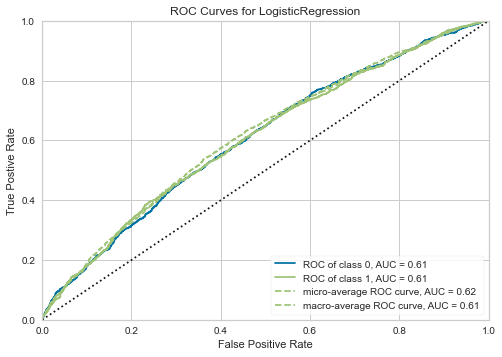

In [39]:
plot_model(tuned_lr, plot='auc')

In [40]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…